# Basics of Convolutional Neural Networks
# Project Description
In this notebook I will go over some of the basics of convolutional neural networks. This notebook will cover what a convolution is, kernels/filters, max/min pooling etc. At the end of explaining the basics I will build a convolutional neural network using pytorch to classify some images. I am doing this project because I wanted to learn how to use pytorch while also implementing and learning about convolutional neural networks. Some knowledge of neural networks would be helpful for this project as well as some python knowledge. If you want to learn more about neural networks I have a notebook where I explain the math and implement one from scratch [here](https://github.com/GaelGil/notebooks/blob/master/convolutions/convolutuionExample.ipynb).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CNN Architecture
Just like in regular feed forward neural networks, in convolutional networks we also have layers. We have the convolutional layer, pooling layer, activation layer and the feed forward part of our network. This is a photo of what it looks like. We will go over each part later in the notebook.
## What is a convolution?
Lets start of with what a convolution is.  A convolution in math is when we combine two functions to get a third one. The convolution of the function $f$ and $g$ is given by 

$$ (f * g)(t) = \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau$$

In convolutional neural networks we have an image which is a matrix and a kernel/filter which is also a matrix. So what we will do is pass a kernel over the image multiplying them and adding to get another image. This is our convolution. I will demonstrate this more later. 

Althought it is not technically a convolution because that would require us to flip the image upside down and then slide the kernel over, the proccess we are going to be discussing is still refered to as a convolution. 

The reason we use convolutions is because they help us extract features from an image. These features will help us classify our image. For example let's say we have a black and white image of the letter X. The kernel would pick up on the diagonal lines of the image and move that forward in the network. If we had an image of the letter O. The kernels would pick up on the curves of the letter and pass those features forward.

With each iteration the kernels will pick up on features that will help us make a prediction. Essentially the convolutons are telling us what in this image is significant. This is feature extraction. Now the important thing is that we have to learn the correct value for the weights in the kernel so that we can get those important features. Lets break down the architecture.

## What is a kernel?
As mentioned a **kernel is a matrix** that we multiply accross an image to perform a convolution. Each kernel will learn to extract important features from our image. After applying the kernel to our image we will end up with another matrix which is the features our filter has extracted. Here is an example of a 3x3 kernel.

In [2]:
kernel = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])

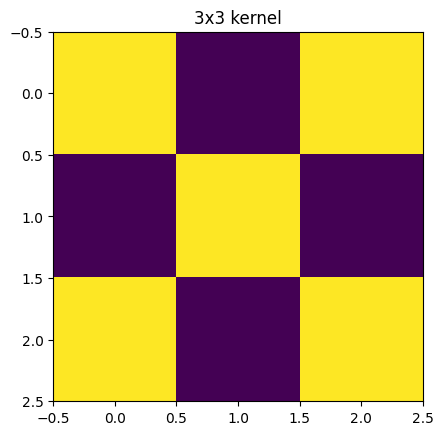

In [3]:
plt.imshow(kernel, cmap="viridis")  # 'viridis' is a common colormap
plt.title('3x3 kernel')
plt.show()

Here is an example of an image, it vaguely looks like a 7. In this case we have one channel. If we had a colored image we would have 3 channels. One for red, green and blue, each its own matrix. Becuase we have one channel (matrix) our image is a gray scale image. Each pixel would be a value between 0 and 1 where 0 is black and 1 is white. For simplicity I made them all 1 and 0.

In [4]:
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 0, 1, 1, 0],
                [0, 0, 0, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 1, 0, 0, 0],
                [0, 0, 0, 1, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]])

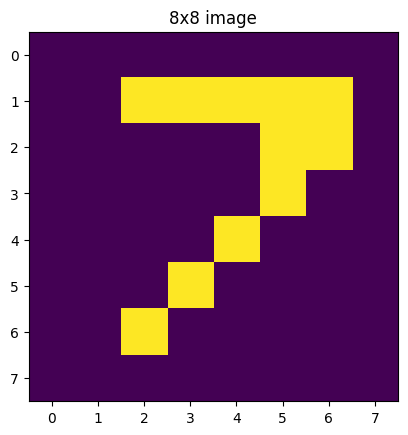

In [5]:
plt.imshow(img, cmap="viridis")
plt.title('8x8 image')
plt.show()

## What is stride? 
When performing a convolution we can move anywhere from 1 to `n` pixels at a time. `n` is given by the kernel size. Let's show a basic example of a convolution with a `4x4 image` and `2x2 kernel` of `stride 2`.
$$img = \begin{bmatrix}
1 & 2 & 1 & 0 \\
4 & 1 & 1 & 2 \\
0 & 4 & 1 & 0 \\
7 & 0 & 8 & 1 \\
\end{bmatrix}
kernel = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}$$

$$ (1*1)+(0*2)+(0*4)+(1*1) = 2 $$
$$ (1*1)+(0*0)+(0*1)+(1*2) = 3 $$
$$ (1*0)+(0*4)+(0*7)+(1*0) = 0 $$
$$ (1*1)+(0*0)+(0*8)+(1*1) = 2 $$
$$
output = \begin{bmatrix}
2 & 3 \\
0 & 2 \\
\end{bmatrix}
$$
If we did `stride 1` our output matrix would look like this.
$$ output = \begin{bmatrix}
2 & 3 & 3\\
8 & 2 & 1 \\
0 & 12 & 2 \\
\end{bmatrix}
$$

##  Max/Min Pooling
Max/Min Pooling is the process in which we go through our image picking either the smallest or largest value in a nxn grid covering the image. Below is an example of an image in which we have performed max pooling with a`2x2` grid with a `stride of 2`. As mentioned stride is how much we slide the grid by.
$$img = \begin{bmatrix}
1 & 2 & 1 & 0 \\
4 & 1 & 1 & 2 \\
0 & 4 & 1 & 0 \\
7 & 0 & 8 & 1 \\
\end{bmatrix}
$$

$$output = \begin{bmatrix}
4 & 2 \\
7 & 8 \\
\end{bmatrix}
$$
If we did a `stride of 1` our output would be.
$$output = \begin{bmatrix}
4 & 2 & 2 \\
4 & 4 & 2 \\
7 & 8 & 8 \\
\end{bmatrix}
$$
We use max/min pooling because in the case of max pooling we reduce the feature space to a smaller matrix and we keep the most important features as well. One last thing to mention is that after pooling we often pass the matrix through a activation layer. This adds non linearity to our network. Essentially we apply a function to each of the values in the matrix.

Now that we have an idea of how convolutions work lets convolve our image with a kernel using a stride of 1 and max pooling with a 2x2 grid with stride 1.

In [9]:
def convolve2d(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape
    output_height = img_height - kernel_height + 1
    output_width = img_width - kernel_width + 1
    output = np.zeros((output_height, output_width))

    for y in range(output_height):
        for x in range(output_width):
            output[y, x] = np.sum(img[y:y+kernel_height, x:x+kernel_width] * kernel)
    
    return output

In [10]:
output = convolve2d(img, kernel)

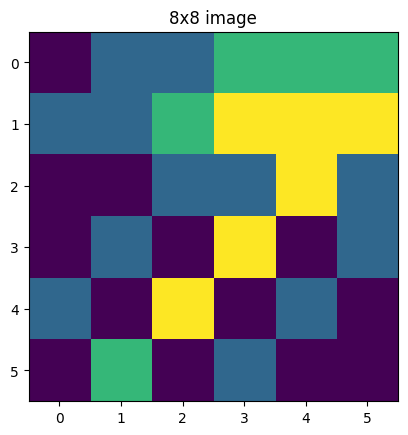

In [12]:
plt.imshow(output)
plt.title('8x8 image')
plt.show()

Since we went over the basics of convolutions lets now go over how convolutional layers work on a colored image. As mentioned if we have a colored image we will have 3 channels (3 matrices) for red green and blue. Our image would then look like this. This is also called our feature map in this case our feature map size is 3 for our three channels. This will chnage after each convolution.

$$
r = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
g = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
b = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

This is our image of size `8x8x3`. The `8x8` is because our matrix is eight rows by eight columns and the three represents the color channels. The matricies contain the intensity for each color red green and blue. This is our input so our next step would be to pass it through the convolutional layer.


Lets say our first convoltuion layer is `2 (4x4x3)`. The 2 and 4x4 are hyperparameters that we set. However the 3 is because we have 3 input channels because of our image. Lets now visualise how the convolution would work.

$$
r = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
g = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
b = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$
$$
kernel_1 red_1 =\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
\hspace{100px}
kernel_2 red_2 =\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$
$$
kernel_1 green_1 =\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
\hspace{100px}
kernel_2 green_2 = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$
$$
kernel_1 blue_1 = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
\hspace{100px}
kernel_2 blue_1 = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
$$

So we will convolove all $kernel_1$ with the image using the corresponding color channels and sum to get an output. We will then do the same with $kernel_2$. If convolve with padding=0 and stride=1. After the convolutions our output will be `5x5x3`. This might be confusing so below is another better visual.

In the below example the input is `3x3x2` because we have 2 channels that are `3x3`. Our first convolution layer `1 (2x2x2)` kernel. There are 2 2x2 kernels because each input gets its own kernel. As we can see, to get the output it is very similar as we did with our convolutions above. The only difference is we sum the multiplications of both kernels. Image credit [here](https://www.youtube.com/watch?v=ZuS9T7Qo_sA)

![rgb_convolution](./images/rgb_convolution.png)

As we saw in the examples above the output dimensions change depending on our kernel size, stride and padding. We can calcualte the output after each convolution using this formula. 
$$output = \frac{n-2(p)-k}{s}+1 $$. 
`n` = input size, `p` = padding size, `k` = kernel size and `s` is stride. 

## How do we get a prediction from this?
Once we are done with the convolutional layers and have extracted all the features we then pass them through a fully connected neural network. In this fully connected network our output layer will be what gives us our predictions. For example when using a neural network to solve MNIST you flatten the image to be 28x28=784. That would go into the input layer. Then we pass the image through the network to get a prediction. 

Our output layer is of course made of 10 neurons each for a number 0-9. The same is done for CNN. Once the convolutions are done all the features we have are flattened and passed to a fully connected neural network. We can actually think of the MNIST dataset as images of hand written digits which have already had convolutions performed on them. We are now just given the features to classify the digits. To learn more about fully connected networks check out my notebook on [github](https://github.com/GaelGil/notebooks/blob/master/back-propagation/back_propagation.ipynb). It goes over feeding forward and back propagation using MNIST.

# Loading and Formating the Data
The data I will be using is an image dataset of dogs and cats that I got from kaggle. The image consists of two folders one for dogs and one for cats. Each folder has 12499 photos for each class. Loading the data in is pretty simple. We simply use the ImageFolder function from pytorch and it loads it for us. After loading in the data we applys some transofrmations to them. For example the transformations that I made to the dataset is resizing all imags to 255x255, made them to pytorch tensors, and normalized it. Normalizing makes all pixels the values in the image to be within a range. Instead of being in a range of 0-255 it is from 0-1. Normalizing the data helps with training. 

# Creating the model
The model I have built that can be found in `./src/CNN.py` will be described in this section. The model contans 3 convolutional layers. Each convolution has `padding=0`, `stride=1` and the kernel size is 5x5. Each convolutional layer is followed by non linearization using ReLU and a max pool `2x2` of stride 2. Lets walk through each step. We won't go over every step of ReLU because it does not change the dimensions of the outputs.

### Input Layer
Our input is is `255x255x3`. This means our images are length `255x255` and are colored images.

### First convolutional layer 
The first convolutional layer is `8 (5x5x3)`. 8 sets of `5x5x3` kernels. 3 Because our input contains 3 channels. To calculate the dimensions of the output we do.
$$\frac{n-2(p)-k}{s}+1 = \frac{255-2(0)-5}{1}+1 = 251$$
Output = `251x251x8`. 8 because we used 8 sets of kernels. 

### First max pooling layer
Now comes our first max pooling layer. The kernel size is `2x2` with stride 2. Since our output from our first convolutional layer is 8 channels. We will be applying max pooling to the each of the 8 channels. We use the same formula to calculate the output. We round down if fraction.
$$\frac{n-2(p)-k}{s}+1 = \frac{251-2(0)-2}{2}+1 = 125$$
Output = `125x125x8`

### Second convolutional layer
Now we will send the output of our previous layer into our second convolutional layer. Our second convolutional layer is `16(5x5x8)`. 16 sets of `5x5x3` kernels. Calculating the dimensions gives us.
$$\frac{n-2(p)-k}{s}+1 = \frac{125-2(0)-5}{1}+1 = 121$$
Output = `121x121x16`

### Second max pooling layer
Now comes our second max pooling layer. The kernel size is `2x2`. Since our output from our second convolutional layer is 16 channels. We will be applying max pooling to the each of the 16 channels. 
$$\frac{n-2(p)-k}{s}+1 = \frac{121-2(0)-2}{2}+1 = 60$$
Output = `60x60x16`


### Third convolutional layer
Our final convolutional layer is `32(5x5x16)`. 32 sets of `5x5x16` kernels.  
$$\frac{n-2(p)-k}{s}+1 = \frac{60-2(0)-5}{1}+1 = 56$$. 
Output is `56x56x32`

### Third max pooling layer
Final max pooling layer. The kernel size is `2x2`.
$$\frac{n-2(p)-k}{s}+1 = \frac{56-2(0)-2}{2}+1 = 28$$
Output = `28x28x32`

### Fully connected Layer
Now we get into the fully connected layers. We flatten output from the last convolutional layer and that will be the input of our fully conneceted network. This means the size of our input layer for our fully connected network will be the size flattened convolutional layer. In our case it will be `28x28x32`. We then have our first hidedn layer which contains 500 nodes. Second hidden layer contains 100 nodes. Then our output layer wich is size 1 corresponding to the number of classes in our dataset. In our case we have 2 classes but we only need 1 node since its binary classification

# Training the model
The dataset contains lots of images of cats and dogs. I trained the model on a couple of hyper parameters. The hyper parameters are `EPOCHS = [10, 15], LR_RATES= [0.00001, 0.0001, 0.001], DROPOUT_RATES = [0.25, 0.5]`. These can be changed in `./src/config.py`. I chose epochs to be 10 and 15 because I felt 5 was too low and anything above 25 or 25 would take a while with all the other hyper parameters. For dropout rate I wanted to have some drop out rate so I decided to not include none. For learning rates I learend early on that higher learning rates would result in my model not learning. This meant that the loss would be at around `0.643` for all iterations. For each training instance I calculated the accuracy on the validation set. I picked the parameters that gave the highest accuracy on the validation set. This was `# Best Params: {'epoch': 10, 'lr': 0.001, 'dropout': 0.25}`. After training on those parameters, the test accuracy came out to `Test Accuracy: 0.7876`.
I used my own nvidia gpu to train the model and it took about a couple of hours. Once it was done training I saved it to `./models/`.

# Analyzing Performence
I actually forgot to save accuracy for each instance (or loss per iteration). So I don't have much to analyze here but I can show some examples of the model working as intended. 

# What Does the CNN See?
As mentioned in the beggining after passing our image through our first convolutional layer our 3 channel rgb image turns into an 8 channel feature map. Once again this is because our first layer has 8 kernels. Each kernel is responsible for extracting important features. Below are some examples of what our model is seeing. 

## First Convolutional Layer

## Second Convolutional Layer

## Third Convolutional Layer